In [ ]:
# A notebook to remove the dilution effect

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from __future__ import print_function, division
import collections


In [2]:
data = np.genfromtxt('Data_Files/XO2_flattened_biweight.dat')

time = data[:,0]
flux = data[:,1]
flux_err = data[:,2]

In [3]:
epoch_tls = 1853.6825
period_tls = 2.61453

<IPython.core.display.Javascript object>


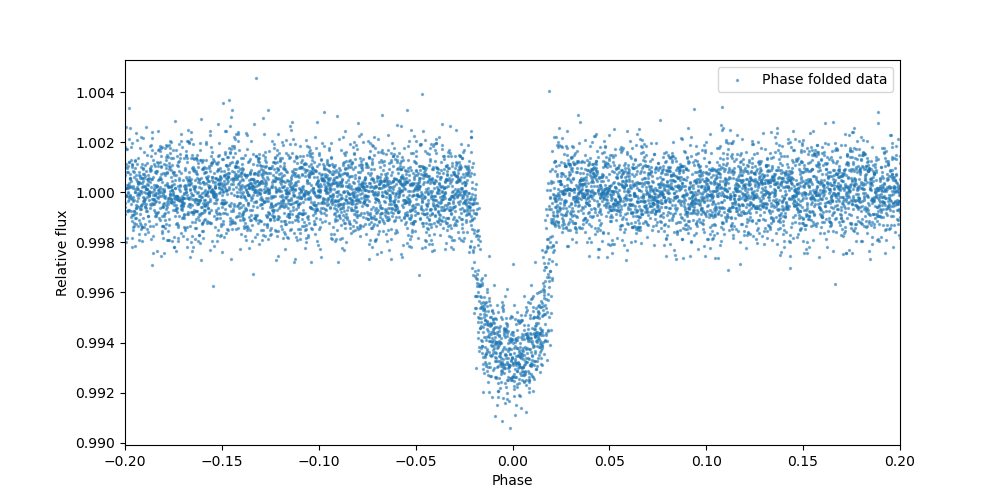

In [9]:
# phase fold plot:
phase = (time - epoch_tls) % period_tls / period_tls
phase[np.where(phase>0.5)] -= 1 
plt.figure(figsize=(10,5))
plt.scatter(phase, flux, c='C0', s=2, alpha=0.5, label='Phase folded data')
plt.xlim(-0.2,0.2)
plt.xlabel("Phase")
plt.ylabel("Relative flux")
plt.legend()
plt.show()

In [ ]:
epoch_tls = 8843.22445
period_tls = 2.61453

XO_curve = np.genfromtxt('Data_Files/XO_flattened_biweight_PyORBIT.dat') 
XO_dilut = np.genfromtxt('Data_Files/XO_flattened_biweight_dilution045_PyORBIT.dat') 

# phase fold plot:
phase = (XO_curve[:,0] - epoch_tls) % period_tls / period_tls
phase[np.where(phase>0.5)] -= 1 

fig = plt.figure(figsize=(8,8))
plt.scatter(phase, XO_curve[:,1], c='C0', s=4)
plt.scatter(phase, XO_dilut[:,1], c='C1', s=4)

plt.ylabel('Normalized flux')
plt.xlabel('Orbital phase')

plt.show()

<IPython.core.display.Javascript object>


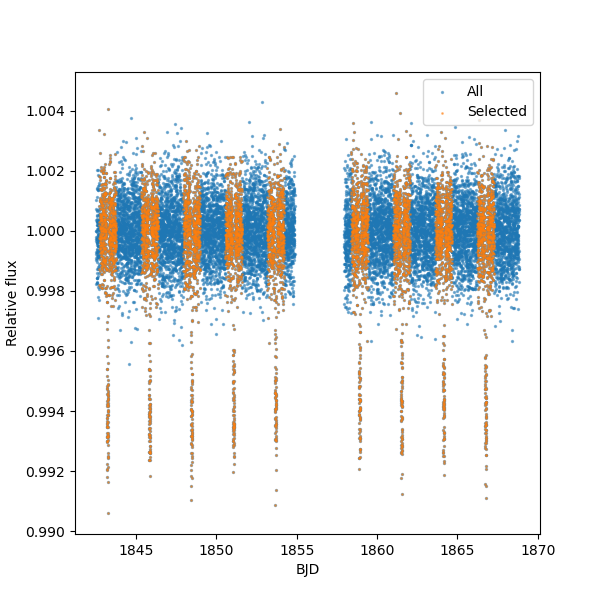

In [5]:
#all points less than phase 0.2
#using boolian array to select the points
phase_selection = (np.abs(phase) < 0.2)

plt.figure(figsize=(6,6))
plt.scatter(time, flux, c='C0', s=2, alpha=0.5, label='All')
plt.scatter(time[phase_selection], flux[phase_selection], c='C1', s=1, alpha=0.5, label='Selected')

plt.xlabel("BJD")
plt.ylabel("Relative flux")
plt.legend()
plt.show()

In [6]:
# preparing the file for the PyORBIT format
#store selected points 

    
# open a file in writing (w) mode
fileout = open('Data_Files/XO_flattened_biweight_PyORBIT.dat', 'w') 

# flatten_lc is equal to flux / trend_lc
# you have to do the same for the error associated to the flux, since it has not ben treated by wotan 
for t,f,e, in zip(time[phase_selection], flux[phase_selection], flux_err[phase_selection]):
    if np.isnan(f): continue
    # TRICK
    fileout.write('{0:17.7f} {1:14f} {2:14f}  0  \n'.format(t, f, e))

fileout.close()

In [7]:

# open a file in writing (w) mode
fileout = open('Data_Files/XO_flattened_biweight_dilution045_PyORBIT.dat', 'w') 

# flatten_lc is equal to flux / trend_lc
# you have to do the same for the error associated to the flux, since it has not ben treated by wotan 
for t,f,e, in zip(time[phase_selection], (flux[phase_selection]+0.45)/1.45, flux_err[phase_selection]):
    if np.isnan(f): continue
    # TRICK
    fileout.write('{0:17.7f} {1:14f} {2:14f}  0  \n'.format(t, f, e))

fileout.close()